#Árboles de Decisión


In [136]:
#importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [137]:
#cargamos el d y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Análisis Exploratorio

Se exploraron las variables para entender su distribución, identificar valores atípicos y posibles correlaciones. Se usaron visualizaciones como histogramas y mapas de calor. 

In [138]:
data.shape

(1599, 12)

In [139]:
#análisis exploratorio
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Preprocesamiento de Datos

Se limpiaron los datos, se imputaron valores faltantes, se codificaron variables categóricas y se escalaron las variables numéricas cuando fue necesario.

In [140]:
data.isna().sum() #No hay valores Nulos!

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [141]:
data.info() #Ver El tipo de dato de cada Columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 3. Análisis de Variables

Se evaluó la relevancia de las variables mediante análisis estadístico y visual. También se detectaron posibles redundancias o relaciones fuertes entre variables.

Text(0.5, 1.0, 'Matriz de Correlación')

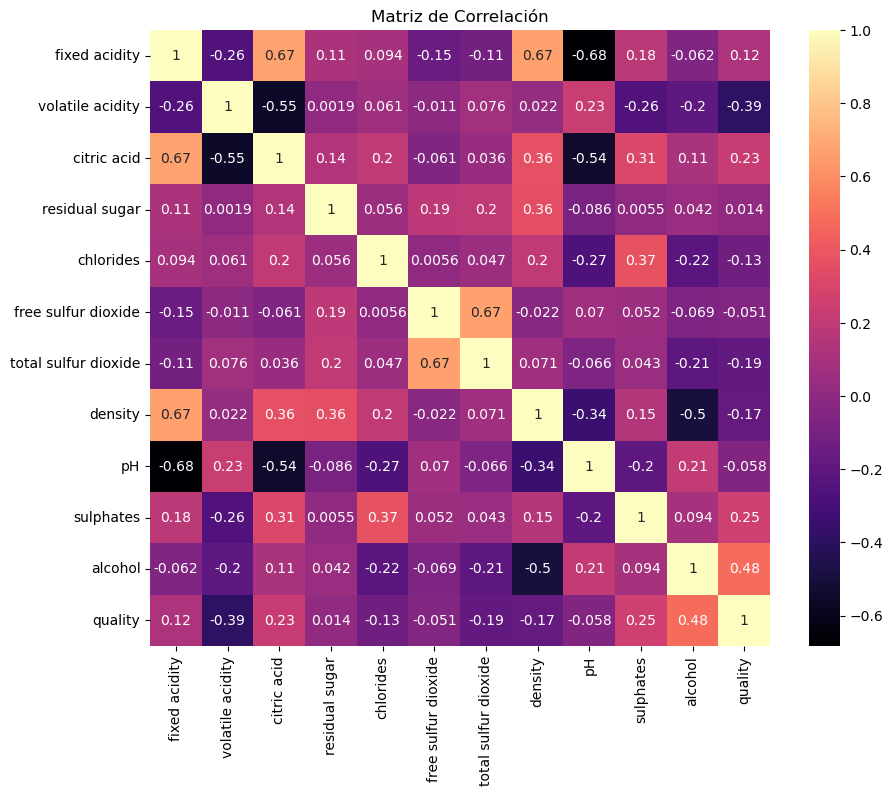

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='magma')
plt.title("Matriz de Correlación")

## 4. Segmentación de Datos

Se dividió el conjunto de datos en entrenamiento(70%) y prueba (30%) para evaluar el rendimiento del modelo de forma objetiva.

In [143]:
# Separar features y target
#Asumiendo que la calidad por encima de 6 es buena, entonces
data['quality'] = data.quality.apply(lambda x : 1 if x > 6 else 0)

y = data['quality']
X = data.drop(['quality'], axis=1)

In [144]:
y.unique()

array([0, 1], dtype=int64)

In [145]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Se preparan los datos realizando una agrupacion de la variable quality ya que la mayoria de vinos son de calidad 5 o 6. por eso se recomienda agruparlos para crear un problema de clasificacion mas balanceado

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Desarrollo del Modelo

Se entrenó un modelo de clasificación (Decision Tree) usando el conjunto de entrenamiento. Se ajustaron parámetros básicos y se validó con métricas estándar.

In [147]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

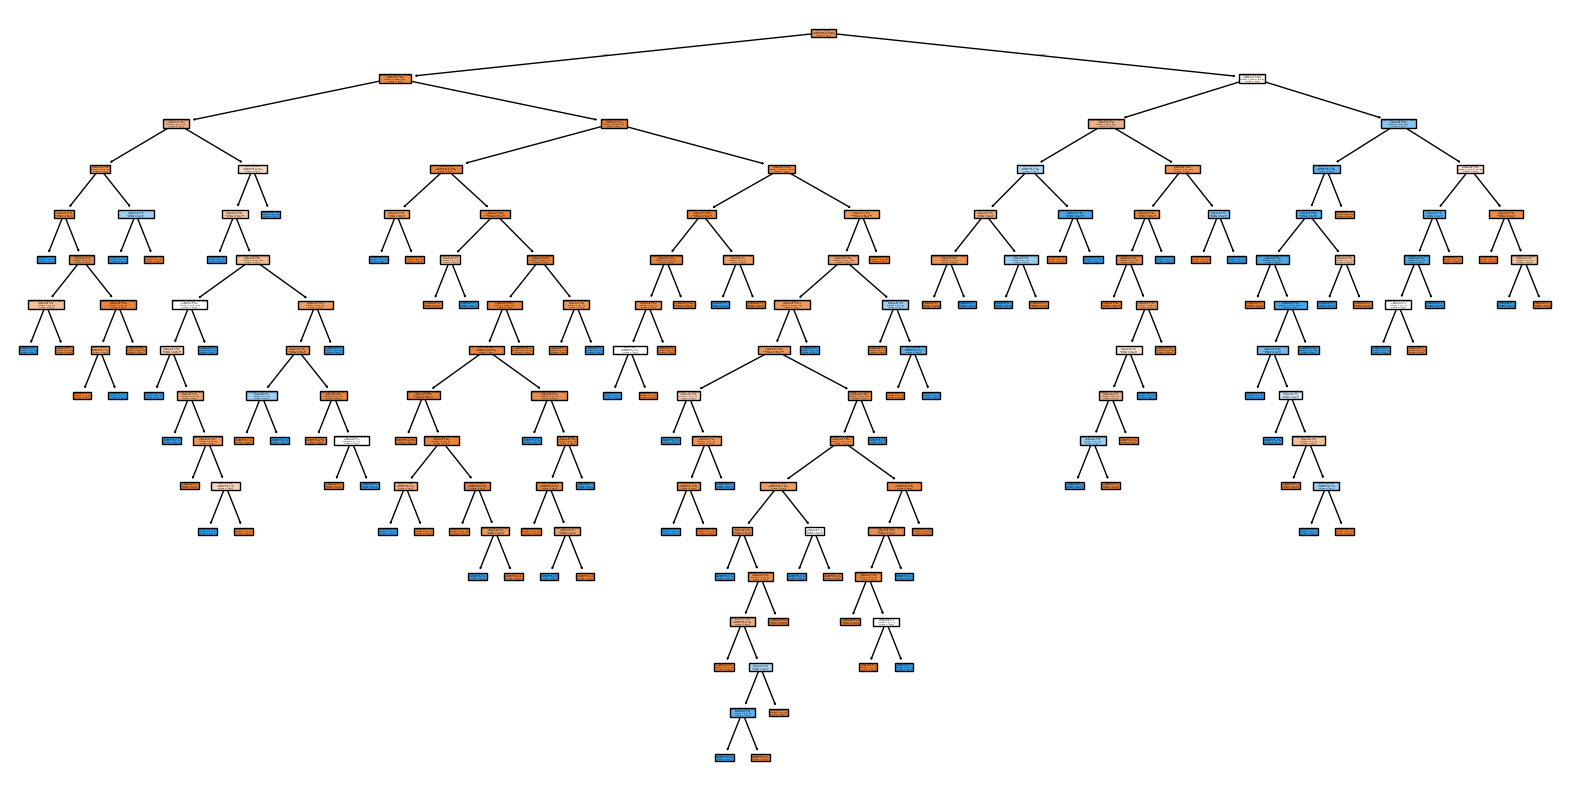

In [148]:
plt.figure(figsize=(20,10))  # Tamaño del árbol, ajusta si es muy grande
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

In [149]:
predicciones = modelo.predict(X_test)

## 6. Resultados del Modelo

Se evaluó el modelo usando precisión, matriz de confusión y visualizaciones. Se compararon los valores reales con los predichos para analizar el desempeño.

In [150]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.8604166666666667

In [151]:
# Precision (promedio macro para múltiples clases)
precision = precision_score(y_test, predicciones, average='macro')
precision

0.7184343434343434

In [152]:

# Recall (sensibilidad)
recall = recall_score(y_test, predicciones, average='macro')
recall

0.7625853781937769

In [153]:
# F1 Score
f1 = f1_score(y_test, predicciones, average='macro')
f1

0.7367365482690591

Text(45.722222222222214, 0.5, 'Valores reales')

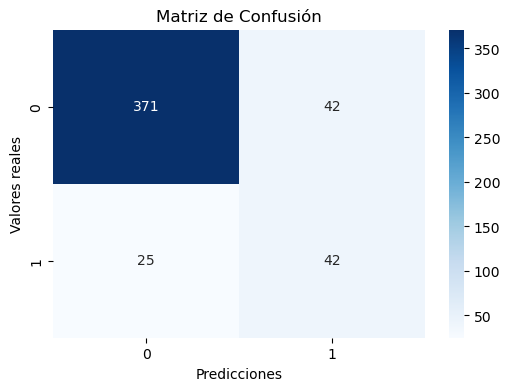

In [154]:
#Confusion Matrix
cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')